### A.Objective: 
### 1. Create samples images from the input signal images for different classes.
### 2. Train the AlexNet model for images
### 3. Test the model for unseen images to classify the signals

### B. Future Scope: 
### 1. Reduce the unbalance data and retrain the model
### 2. Use high computational power if availbale for include the all the data and train the model to get high efficient robust model.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

import wfdb

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.preprocessing import LabelEncoder

In [ ]:
# pip install wfdb

In [5]:
d1=pd.read_csv('ECGPCGSpreadsheet_tagged.csv')
d1.head()

,RecordName,Subject ID,Record Duration (min),Age (years),Gender,Recording Scenario,Num Channels,ECG Notes,PCG Notes,PCG2 Notes,AUX1 Notes,AUX2 Notes,Database Housekeeping,Tag,Label
0,ECGPCG0001,S023,30.0,NaN,Male,Exercise: pedaling a stationary bicycle,2,Good,Good,NaN,NaN,NaN,Replaced file ID 01,Stationary_Bicycle,4
1,ECGPCG0002,S024,30.0,NaN,Male,Exercise: pedaling a stationary bicycle,2,Good; occasional saturation,Good,NaN,NaN,NaN,Replaced file ID 02,Stationary_Bicycle,4
2,ECGPCG0003,S003,0.5,28.0,Male,Rest: sitting on armchair,2,Good,Good,NaN,NaN,NaN,Replaced file ID 03 (PG),Sitting_on_Armchair,2
3,ECGPCG0004,S004,0.5,26.0,Male,Rest: sitting on armchair,5,Good,Occasional burst powerline noise,Quantization noise level,Quantization noise level,Quantization noise level,NaN,Sitting_on_Armchair,2
4,ECGPCG0005,S005,0.5,23.0,Male,Rest: sitting on armchair,5,Good,Occasional burst powerline noise,Quantization noise level,Quantization noise level,Quantization noise level,NaN,Sitting_on_Armchair,2


In [6]:
unique_tags=d1['Tag'].unique()
print(unique_tags)

['Stationary_Bicycle' 'Sitting_on_Armchair' 'Laying_on_Bed' 'Slow_Walk'
 'Tradmill' 'Walking_constant_speed' 'Bicycle_stress_Test']


### Creating samples images based on the 69 signals (Currently only 3 signal files are taken as input)

In [10]:
image_paths = []
labels = []
save_directory = r'C:\DataScience_StudyMaterial\ECG_Signal_Project\Images'

for file_name in d1['RecordName']:
    base_directory = r'C:\DataScience_StudyMaterial\ECG_Signal_Project\Data'
    file_path = os.path.join(base_directory, file_name)

    record_total = wfdb.rdrecord(file_path)
    df_1 = record_total.to_dataframe()
    df_reset_1 = df_1.reset_index(drop=True)
    len_df = len(df_reset_1)
    
    label = d1.loc[d1['RecordName'] == file_name, 'Tag'].values[0]
    count =0
    for i in range(len_df // 10000):
        record = wfdb.rdrecord(file_path, sampfrom=i * 10000, sampto=(i + 1) * 10000)
        df = record.to_dataframe()
        df_reset = df.reset_index(drop=True)

        plt.figure(figsize=(12, 6))
        plt.plot(df_reset.index, df_reset.values)
        plt.xlabel('Sample Number')
        plt.ylabel('Amplitude')

        # Define the label and save path
        label = label  # Replace with actual label or a method to assign labels
        image_filename = f'{file_name}_segment_{count}_{label}.png'
        save_path = os.path.join(save_directory, image_filename)
        count=count+1
        # Save the figure as an image
        plt.savefig(save_path)
        plt.close()

        # Append the image path and label to their respective lists
        image_paths.append(save_path)
        with open("image_paths.txt", "w") as file:
            file.write(str(image_paths))
            
        labels.append(label)
        with open("labels.txt", "w") as file:
            file.write(str(labels))


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\DataScience_StudyMaterial\\ECG_Signal_Project\\Data\\ECGPCG0004.hea'

### Visualize Sample Images

Visualizing Training Images:


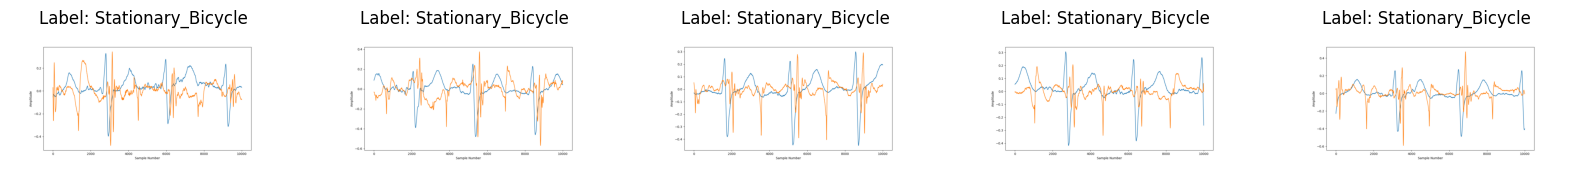

In [12]:
def visualize_images(image_paths, labels, num_images=10):
    indices = np.random.choice(len(image_paths), num_images, replace=False)
    
    plt.figure(figsize=(20, 10))
    
    for i, idx in enumerate(indices):
        img_path = image_paths[idx]
        label = labels[idx]
        
        # Load and display the image
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f'Label: {label}')
        plt.axis('off')
    
    plt.show()

# Visualize some images from the training set
print("Visualizing Training Images:")
visualize_images(image_paths, labels, num_images=5)

### Training and testing of AlexNet Model

In [14]:

# Step 1: Prepare the data
def load_data(image_paths, labels, target_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = Image.open(img_path).convert("RGB")
        img = img.resize(target_size)
        img = np.array(img)
        images.append(img)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels


In [15]:
# Load and preprocess data
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.1, random_state=42)


In [33]:
X_train, y_train = load_data(train_image_paths, train_labels)
X_test, y_test = load_data(test_image_paths, test_labels)

# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

MemoryError: Unable to allocate 2.93 GiB for an array with shape (2613, 224, 224, 3) and data type float64

In [19]:
y_train

array(['Stationary_Bicycle', 'Stationary_Bicycle', 'Stationary_Bicycle',
       ..., 'Stationary_Bicycle', 'Stationary_Bicycle',
       'Stationary_Bicycle'], dtype='<U19')

In [28]:
y_train = np.unique(y_train)
y_test =np.unique(y_test)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform training labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert integer labels to one-hot encoding
num_classes = len(label_encoder.classes_)  # Number of unique classes
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=num_classes)

print("One-hot encoded y_train:")
print(y_train_one_hot)
print("One-hot encoded y_test:")
print(y_test_one_hot)

One-hot encoded y_train:
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
One-hot encoded y_test:
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [29]:
len(set(labels))

2

In [32]:
# Step 2: Define the AlexNet model
def AlexNet(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=4, padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((3, 3), strides=2),
        
        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),
        
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),
        
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

model = AlexNet(input_shape=(224, 224, 3), num_classes=len(set(labels)))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the model
num_epochs = 2
batch_size = 3

# Use only a fraction of the data for testing
subset_size = 100  # Adjust as needed
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:subset_size]
y_test_subset = y_test[:subset_size]

history = model.fit(X_train_subset, y_train_subset, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test_subset, y_test_subset))


# history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, 
#                     validation_data=(X_test, y_test))

# Step 4: Test the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Step 5: Plot accuracy vs. epoch and loss vs. epoch
# Plot training & validation accuracy values
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epoch')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b', label='Training Loss')
plt.plot(history.history['val_loss'], 'r', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epoch')

plt.show()


ValueError: Data cardinality is ambiguous:
  x sizes: 100
  y sizes: 7
Make sure all arrays contain the same number of samples.